In [713]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, confusion_matrix


In [714]:
db = 'Refseq'

In [715]:
if db == 'Refseq':
    pred_file = 'blastn/preds_blastn_refseq_in_house_dna_seq'
elif db == 'Urinary_2-10':
    pred_file = 'blastn/preds_blastn_urinary_max10_min2_dna_seq'

path_to_file = '/home/marthe/Documents/DS/projet/local/frogsdays/preds_v1/' + pred_file + '.csv'
pred = pd.read_csv(path_to_file)

test = pd.read_csv('/home/marthe/Documents/DS/projet/local/frogsdays/test_sets/test_set_from_refseq.csv')

In [716]:
pred = pred.fillna('undefined')

In [717]:
taxonomy_levels = ['domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']

for level in taxonomy_levels[-3:]:
    print(level)
    accuracy = accuracy_score(test[level], pred[level])
    precision = precision_score(test[level], pred[level], average = 'weighted', zero_division = np.nan)
    f1 = f1_score(test[level], pred[level], average = 'weighted', zero_division = np.nan)
    print('accuracy : {}, precision : {}, f1 : {}'.format(accuracy, precision, f1))
    

family
accuracy : 0.9857651245551602, precision : 0.9899018579727217, f1 : 0.9860008563699809
genus
accuracy : 0.9347568208778173, precision : 0.968576154593641, f1 : 0.9319961256055751
species
accuracy : 0.5836298932384342, precision : 0.9387595532039976, f1 : 0.5761306441021744


In [718]:
test = test.rename({'domain' : 'true_domain',
                    'phylum' : 'true_phylum',
                    'class' : 'true_class',
                    'order' : 'true_order',
                    'family' : 'true_family',
                    'genus' : 'true_genus',
                    'species' : 'true_species'}, axis = 1)
                

pred = pred.rename({'domain' : 'pred_domain',
                    'phylum' : 'pred_phylum',
                    'class' : 'pred_class',
                    'order' : 'pred_order',
                    'family' : 'pred_family',
                    'genus' : 'pred_genus',
                    'species' : 'pred_species',
                    'test_seq_id' : 'seq_id'}, axis = 1)


In [719]:
print(test.shape)
print(pred.shape)

(843, 11)
(843, 8)


In [720]:
print(test['true_species'].unique)

<bound method Series.unique of 0         Bacillus sp. (in: firmicutes)
1             Ectopseudomonas mendocina
2      Arcanobacterium urinimassiliense
3             Pseudescherichia vulneris
4                    Klebsiella oxytoca
                     ...               
838              Pseudomonas aeruginosa
839                   Vibrio vulnificus
840                  Bacteroides caccae
841                 Salmonella enterica
842            Mammaliicoccus vitulinus
Name: true_species, Length: 843, dtype: object>


In [721]:
print('true labels')
display(test.head())

print('predictions')
display(pred.head())

true labels


,txid,seq_id,true_domain,true_phylum,true_class,true_order,true_family,true_genus,true_species,dna_seq,contains_N
0,1409,>PX446555.1 Bacillus sp. (in: firmicutes) stra...,Bacteria,Bacillota,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus sp. (in: firmicutes),CCTACGGGAGGCAGCAGTAGGGAATCTTCCGCAATGGACGAAAGTC...,False
1,300,>PV065616.1 Ectopseudomonas mendocina strain T...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Ectopseudomonas,Ectopseudomonas mendocina,CCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCC...,False
2,1871014,>PQ236870.1 Arcanobacterium urinimassiliense s...,Bacteria,Actinomycetota,Actinomycetes,Actinomycetales,Actinomycetaceae,Arcanobacterium,Arcanobacterium urinimassiliense,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGACGGAAGTC...,False
3,566,>MN044881.1 Pseudescherichia vulneris strain A...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Pseudescherichia,Pseudescherichia vulneris,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCC...,False
4,571,>PX056928.1 Klebsiella oxytoca strain SY7 16S ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella oxytoca,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCC...,False


predictions


,seq_id,pred_domain,pred_phylum,pred_class,pred_order,pred_family,pred_genus,pred_species
0,>PX446555.1 Bacillus sp. (in: firmicutes) stra...,Bacteria,Bacillota,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus cereus
1,>PV065616.1 Ectopseudomonas mendocina strain T...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Ectopseudomonas,Ectopseudomonas alcaliphila
2,>PQ236870.1 Arcanobacterium urinimassiliense s...,Bacteria,Actinomycetota,Actinomycetes,Actinomycetales,Actinomycetaceae,Arcanobacterium,Arcanobacterium urinimassiliense
3,>MN044881.1 Pseudescherichia vulneris strain A...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Pseudescherichia,Pseudescherichia vulneris
4,>PX056928.1 Klebsiella oxytoca strain SY7 16S ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Enterobacter,Enterobacter bugandensis


In [722]:
global_data = test.merge(right = pred, on = 'seq_id')
global_data = global_data.drop(['dna_seq', 'contains_N'], axis = 1)

In [723]:
global_data

,txid,seq_id,true_domain,true_phylum,true_class,true_order,true_family,true_genus,true_species,pred_domain,pred_phylum,pred_class,pred_order,pred_family,pred_genus,pred_species
0,1409,>PX446555.1 Bacillus sp. (in: firmicutes) stra...,Bacteria,Bacillota,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus sp. (in: firmicutes),Bacteria,Bacillota,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus cereus
1,300,>PV065616.1 Ectopseudomonas mendocina strain T...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Ectopseudomonas,Ectopseudomonas mendocina,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Ectopseudomonas,Ectopseudomonas alcaliphila
2,1871014,>PQ236870.1 Arcanobacterium urinimassiliense s...,Bacteria,Actinomycetota,Actinomycetes,Actinomycetales,Actinomycetaceae,Arcanobacterium,Arcanobacterium urinimassiliense,Bacteria,Actinomycetota,Actinomycetes,Actinomycetales,Actinomycetaceae,Arcanobacterium,Arcanobacterium urinimassiliense
3,566,>MN044881.1 Pseudescherichia vulneris strain A...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Pseudescherichia,Pseudescherichia vulneris,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Pseudescherichia,Pseudescherichia vulneris
4,571,>PX056928.1 Klebsiella oxytoca strain SY7 16S ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella oxytoca,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Enterobacter,Enterobacter bugandensis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,287,>PX454514.1 Pseudomonas aeruginosa strain SKVM...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas aeruginosa,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas aeruginosa
839,672,>PX410417.1 Vibrio vulnificus strain V5WW 16S ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio vulnificus,Bacteria,Pseudomonadota,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio parahaemolyticus
840,47678,>PV276726.1 Bacteroides caccae strain 27336 16...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides caccae,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides caccae
841,54388,>KM977902.1 Salmonella enterica subsp. enteric...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Salmonella,Salmonella enterica,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Salmonella,Salmonella enterica


In [724]:
sorted(global_data['true_species'].unique())

['Abiotrophia defectiva',
 'Achromobacter denitrificans',
 'Achromobacter insolitus',
 'Achromobacter xylosoxidans',
 'Acidaminococcus intestini',
 'Acidovorax delafieldii',
 'Acinetobacter baumannii',
 'Acinetobacter bereziniae',
 'Acinetobacter calcoaceticus',
 'Acinetobacter guillouiae',
 'Acinetobacter haemolyticus',
 'Acinetobacter johnsonii',
 'Acinetobacter nosocomialis',
 'Acinetobacter radioresistens',
 'Acinetobacter schindleri',
 'Acinetobacter septicus',
 'Acinetobacter sp.',
 'Acinetobacter ursingii',
 'Actinobaculum massiliense',
 'Actinomyces israelii',
 'Actinomyces naeslundii',
 'Actinomyces oris',
 'Actinomyces sp.',
 'Actinomyces urogenitalis',
 'Actinomyces viscosus',
 'Actinotignum schaalii',
 'Actinotignum urinale',
 'Aedoeadaptatus urinae',
 'Aerococcus urinae',
 'Aerococcus viridans',
 'Aeromonas enteropelogenes',
 'Aeromonas hydrophila',
 'Aeromonas popoffii',
 'Aeromonas salmonicida',
 'Aeromonas veronii',
 'Agrobacterium radiobacter',
 'Akkermansia muciniphil

In [725]:
patho = ['Actinotignum schaalii', 'Actinobaculum schaalii', 'Aerococcus sanguinicola', 'Aerococcus urinae', 'Aerococcus viridans', 'Alloscardovia omnicolens', 'Enterobacter spp', 'Enterococcus faecalis', 'Enterococcus faecium', 'Escherichia coli', 'Klebsiella pneumoniae', 'Proteus mirabilis', 'Pseudomonas aeruginosa', 'Staphylococcus saprophyticus', 'Streptococcus spp']
lacto = ['Lactobacillus', 'Lacticaseibacillus', 'Limosilactobacillus']

In [726]:
#species_of_interest = global_data.loc[(global_data['true_species'].isin(patho)) | (global_data['pred_species'].isin(patho))]
patho_of_interest = global_data.loc[(global_data['true_species'].isin(patho)) | (global_data['pred_species'].isin(patho))]
lacto_of_interest = global_data.loc[(global_data['true_genus'].isin(lacto)) | (global_data['pred_genus'].isin(lacto))]



In [727]:
sorted(patho_of_interest['true_species'].unique())

['Actinotignum schaalii',
 'Aerococcus urinae',
 'Aerococcus viridans',
 'Alloscardovia omnicolens',
 'Enterococcus faecalis',
 'Enterococcus faecium',
 'Escherichia coli',
 'Facklamia hominis',
 'Klebsiella pneumoniae',
 'Proteus mirabilis',
 'Pseudomonas aeruginosa',
 'Staphylococcus saprophyticus']

In [728]:
def abbreviation(chaine):
    mots = chaine.split()
    print(mots)
    mots[0] = mots[0][0]+'. '
    print(mots[0], mots[1])
    new_chaine = str(mots[0] + mots[1])
    return new_chaine



In [729]:
#patho_of_interest.loc[(patho_of_interest['true_species'].isin(patho))&(patho_of_interest['correct_pred']== False)]['correct_pred'] = 'False_pos'
patho_of_interest.loc[(patho_of_interest['true_species'].isin(patho))]

,txid,seq_id,true_domain,true_phylum,true_class,true_order,true_family,true_genus,true_species,pred_domain,pred_phylum,pred_class,pred_order,pred_family,pred_genus,pred_species
48,574,>OQ405995.1 Klebsiella pneumoniae subsp. ozaen...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella quasipneumoniae
89,1352,>PX419837.1 Enterococcus faecium strain 30248 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus durans
117,573,>PX442971.1 Klebsiella pneumoniae strain LP-LF...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,Klebsiella quasipneumoniae
135,1352,>PX419836.1 Enterococcus faecium strain 30247 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus durans
174,562,>PX376618.1 Escherichia coli strain S2C 16S ri...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Shigella,Shigella flexneri
200,419015,>PX443654.1 Alloscardovia omnicolens strain 14...,Bacteria,Actinomycetota,Actinomycetes,Bifidobacteriales,Bifidobacteriaceae,Alloscardovia,Alloscardovia omnicolens,Bacteria,Actinomycetota,Actinomycetes,Bifidobacteriales,Bifidobacteriaceae,Alloscardovia,Alloscardovia omnicolens
266,1351,>PX420864.1 Enterococcus faecalis strain 28957...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecalis,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecalis
277,562,>PX380553.1 Escherichia coli strain EM9025 16S...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Shigella,Shigella flexneri
337,1352,>PX419906.1 Enterococcus faecium strain 28695 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus durans
349,1352,>PX419907.1 Enterococcus faecium strain 28696 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus durans


In [730]:
patho_of_interest['true_species'] = patho_of_interest['true_species'].apply(lambda x: abbreviation(x))
patho_of_interest['pred_species'] = patho_of_interest['pred_species'].apply(lambda x: abbreviation(x))


['Klebsiella', 'pneumoniae']
K.  pneumoniae
['Enterococcus', 'faecium']
E.  faecium
['Klebsiella', 'pneumoniae']
K.  pneumoniae
['Enterococcus', 'faecium']
E.  faecium
['Escherichia', 'coli']
E.  coli
['Alloscardovia', 'omnicolens']
A.  omnicolens
['Enterococcus', 'faecalis']
E.  faecalis
['Escherichia', 'coli']
E.  coli
['Enterococcus', 'faecium']
E.  faecium
['Enterococcus', 'faecium']
E.  faecium
['Pseudomonas', 'aeruginosa']
P.  aeruginosa
['Alloscardovia', 'omnicolens']
A.  omnicolens
['Klebsiella', 'pneumoniae']
K.  pneumoniae
['Staphylococcus', 'saprophyticus']
S.  saprophyticus
['Alloscardovia', 'omnicolens']
A.  omnicolens
['Aerococcus', 'viridans']
A.  viridans
['Enterococcus', 'faecium']
E.  faecium
['Facklamia', 'hominis']
F.  hominis
['Actinotignum', 'schaalii']
A.  schaalii
['Escherichia', 'coli']
E.  coli
['Klebsiella', 'pneumoniae']
K.  pneumoniae
['Actinotignum', 'schaalii']
A.  schaalii
['Escherichia', 'coli']
E.  coli
['Alloscardovia', 'omnicolens']
A.  omnicolens
['

/tmp/ipykernel_389/1033635942.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_389/1033635942.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



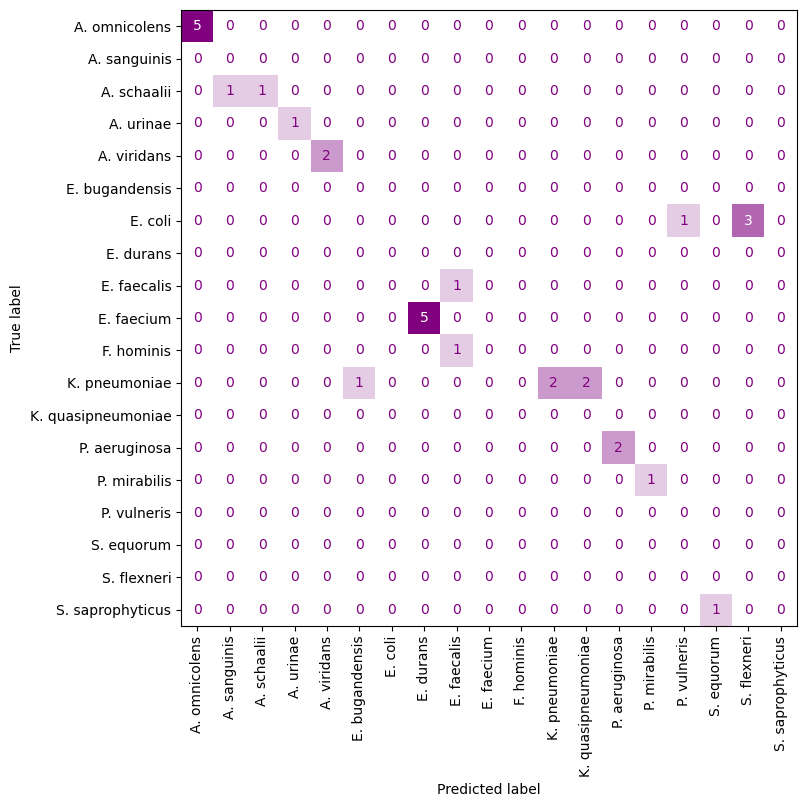

In [731]:

colors = ['white', 'purple']
new_cmap = LinearSegmentedColormap.from_list('blue_white_red', colors)

norm = mcolors.Normalize(vmin=0, vmax=10)

disp = ConfusionMatrixDisplay.from_predictions(patho_of_interest['true_species'],
                                                patho_of_interest['pred_species'],
                                                xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                colorbar = False,
                                                cmap = new_cmap
                                                )
fig = disp.ax_.get_figure() 

fig.set_figwidth(8)
fig.set_figheight(8) 

In [732]:
colors = ['white', new_cmap(0.6)]
new_cmap = LinearSegmentedColormap.from_list('blue_white_red', colors)


In [733]:
lacto_of_interest['true_species'] = lacto_of_interest['true_species'].apply(lambda x: abbreviation(x))
lacto_of_interest['pred_species'] = lacto_of_interest['pred_species'].apply(lambda x: abbreviation(x))


['Lactobacillus', 'gasseri']
L.  gasseri
['Lactobacillus', 'delbrueckii']
L.  delbrueckii
['Lacticaseibacillus', 'rhamnosus']
L.  rhamnosus
['Lacticaseibacillus', 'rhamnosus']
L.  rhamnosus
['Lactobacillus', 'acidophilus']
L.  acidophilus
['Lactobacillus', 'acidophilus']
L.  acidophilus
['Lactobacillus', 'jensenii']
L.  jensenii
['Limosilactobacillus', 'vaginalis']
L.  vaginalis
['Limosilactobacillus', 'fermentum']
L.  fermentum
['Lactobacillus', 'crispatus']
L.  crispatus
['Lacticaseibacillus', 'casei']
L.  casei
['Lactobacillus', 'iners']
L.  iners
['Lactobacillus', 'jensenii']
L.  jensenii
['Lacticaseibacillus', 'rhamnosus']
L.  rhamnosus
['Limosilactobacillus', 'fermentum']
L.  fermentum
['Lactobacillus', 'gasseri']
L.  gasseri
['Lactobacillus', 'delbrueckii']
L.  delbrueckii
['Lactobacillus', 'jensenii']
L.  jensenii
['Lactobacillus', 'delbrueckii']
L.  delbrueckii
['Lactobacillus', 'crispatus']
L.  crispatus
['Limosilactobacillus', 'vaginalis']
L.  vaginalis
['Limosilactobacillus

/tmp/ipykernel_389/2851809426.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_389/2851809426.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



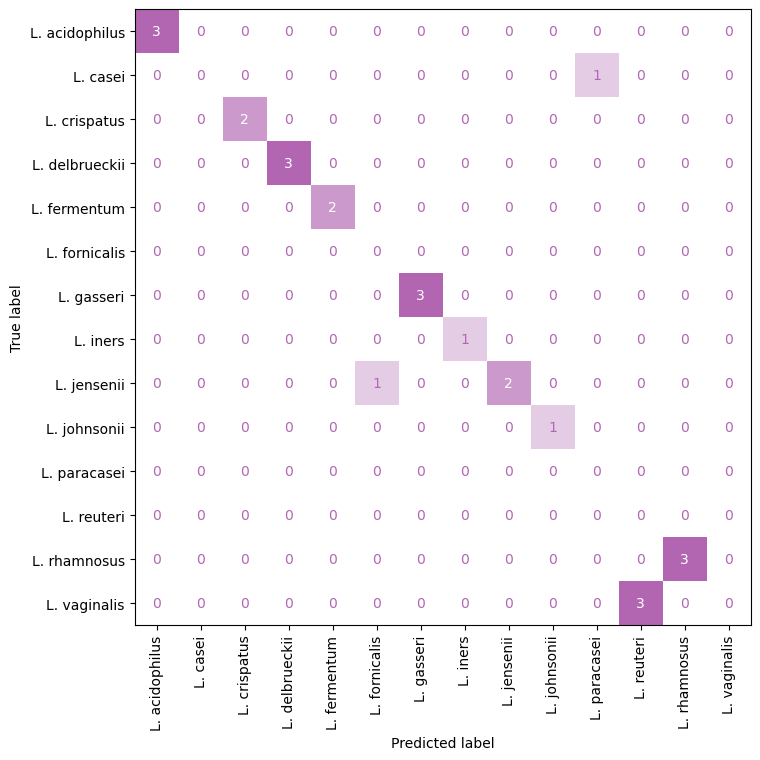

In [734]:
disp = ConfusionMatrixDisplay.from_predictions(lacto_of_interest['true_species'],
                                                lacto_of_interest['pred_species'],
                                                xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                colorbar = False,
                                                cmap = new_cmap)
fig = disp.ax_.get_figure() 
fig.set_figwidth(8)
fig.set_figheight(8) 

In [735]:
hist_colors = [px.colors.qualitative.G10[3], px.colors.qualitative.G10[2]]

In [736]:
patho_of_interest['correct_pred'] = (patho_of_interest['pred_species'] == patho_of_interest['true_species'])


/tmp/ipykernel_389/1873858430.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [737]:
patho_of_interest

,txid,seq_id,true_domain,true_phylum,true_class,true_order,true_family,true_genus,true_species,pred_domain,pred_phylum,pred_class,pred_order,pred_family,pred_genus,pred_species,correct_pred
48,574,>OQ405995.1 Klebsiella pneumoniae subsp. ozaen...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,K. pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,K. quasipneumoniae,False
89,1352,>PX419837.1 Enterococcus faecium strain 30248 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. durans,False
117,573,>PX442971.1 Klebsiella pneumoniae strain LP-LF...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,K. pneumoniae,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,K. quasipneumoniae,False
135,1352,>PX419836.1 Enterococcus faecium strain 30247 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. durans,False
174,562,>PX376618.1 Escherichia coli strain S2C 16S ri...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,E. coli,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Shigella,S. flexneri,False
200,419015,>PX443654.1 Alloscardovia omnicolens strain 14...,Bacteria,Actinomycetota,Actinomycetes,Bifidobacteriales,Bifidobacteriaceae,Alloscardovia,A. omnicolens,Bacteria,Actinomycetota,Actinomycetes,Bifidobacteriales,Bifidobacteriaceae,Alloscardovia,A. omnicolens,True
266,1351,>PX420864.1 Enterococcus faecalis strain 28957...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. faecalis,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. faecalis,True
277,562,>PX380553.1 Escherichia coli strain EM9025 16S...,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,E. coli,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Shigella,S. flexneri,False
337,1352,>PX419906.1 Enterococcus faecium strain 28695 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. durans,False
349,1352,>PX419907.1 Enterococcus faecium strain 28696 ...,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. faecium,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,E. durans,False


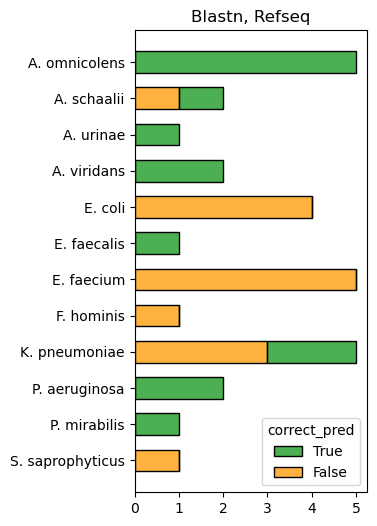

In [738]:
patho_of_interest = patho_of_interest.sort_values('true_species')
xmax = max(patho_of_interest['true_species'].value_counts())

fig = plt.figure(figsize = [3,6])


sns.histplot(
    data = patho_of_interest, 
    y = 'true_species', 
    hue = 'correct_pred', 
    hue_order=[True, False], 
    multiple = 'stack', 
    shrink = 0.6, 
    palette = hist_colors,
    legend = True)

plt.title('Blastn, ' + db)
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,xmax+1,1))
plt.show();

/tmp/ipykernel_389/883621833.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



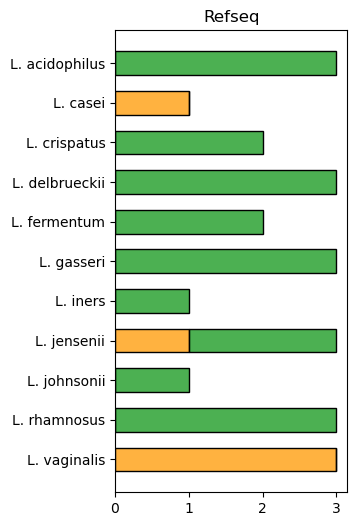

In [739]:
lacto_of_interest['correct_pred'] = (lacto_of_interest['pred_species'] == lacto_of_interest['true_species'])
lacto_of_interest = lacto_of_interest.sort_values('true_species')
xmax = max(lacto_of_interest['true_species'].value_counts())

fig = plt.figure(figsize = [3,6])


sns.histplot(
    data = lacto_of_interest,
    y = 'true_species', 
    hue = 'correct_pred', 
    hue_order=[True, False], 
    multiple = 'stack', 
    shrink = 0.6, 
    legend = False, 
    palette = hist_colors)

plt.title(db)
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(0,xmax+1,1))
plt.show();

In [740]:
common_genus = ['Aerococcus', 'Anaerococcus', 'Actinomyces', 'Actinotignum', 'Alloscardovia', 'Bifidobacterium', 'Corynebacterium', 'Dialister', 'Enterococcus', 'Escherichia', 'Facklamia', 'Fannyhessea', 'Finegoldia', 'Gardnerella', 'Klebsiella', 'Lacticaseibacillus', 'Lactobacillus', 'Limosilactobacillus', 'Prevotella', 'Propionimicrobium', 'Proteus', 'Ralstonia', 'Staphylococcus', 'Streptococcus', 'Winkia']

In [741]:
genus_of_interest = global_data.loc[(global_data['true_genus'].isin(common_genus)) | (global_data['pred_genus'].isin(common_genus))]

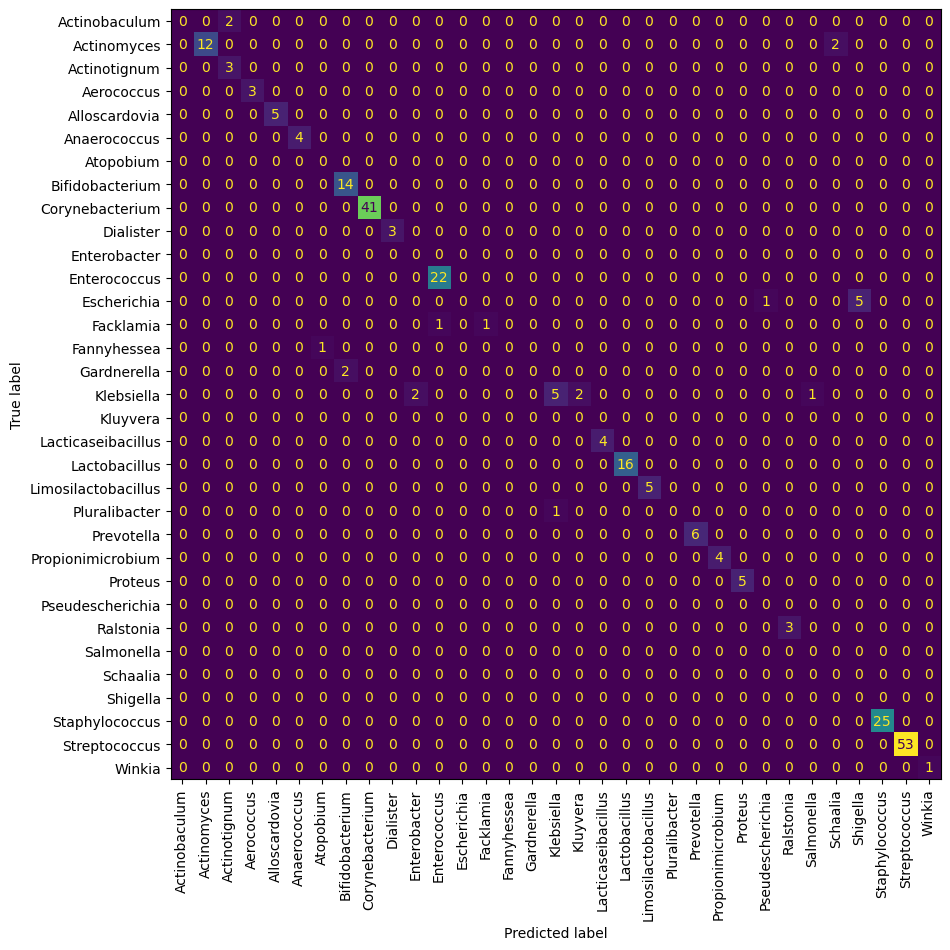

In [742]:
disp = ConfusionMatrixDisplay.from_predictions(genus_of_interest['true_genus'],
                                                genus_of_interest['pred_genus'],
                                                xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                colorbar = False)
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10) 

In [743]:
print(classification_report(species_of_interest['true_genus'], species_of_interest['pred_genus'], zero_division = np.nan))

NameError: name 'species_of_interest' is not defined

<Axes: >

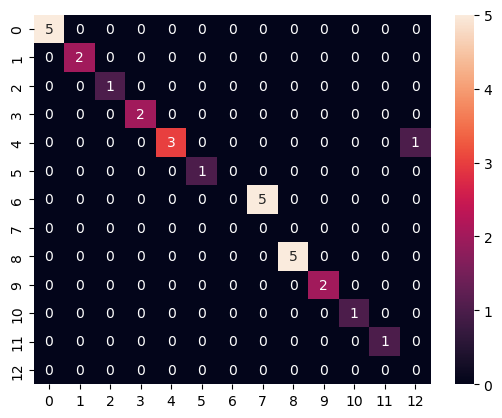

In [ ]:
cm = confusion_matrix(patho_of_interest['true_species'],
                                                patho_of_interest['pred_species']
                                                #xticks_rotation = 'vertical',
                                                #normalize = 'true',
                                                #colorbar = False,
                                                #cmap = 'OrRd'
                                                )


sns.heatmap(cm, annot = True, cmap= )
